In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # For higher resolution figures (optional)

In [2]:
primary_df = pd.read_csv('Data\Avaluaci__de_sis__d_educaci__prim_ria.csv')
primary_df = primary_df.drop_duplicates()
secondary_df = pd.read_csv('Data\Avaluaci__de_quart_d_Educaci__Secund_ria_Obligat_ria_20231112.csv')
secondary_df = secondary_df.drop_duplicates()

In [4]:
def plot_corr_double(primary_df, secondary_df, fields_1,fields_2, title):
    correlations_1 = primary_df[fields_1].corr()
    correlations_2 = secondary_df[fields_2].corr()
    combined_correlations = np.zeros_like(correlations_1)
    combined_correlations[np.triu_indices_from(combined_correlations)] = correlations_1.values[np.triu_indices_from(correlations_1)]
    combined_correlations[np.tril_indices_from(combined_correlations, k=-1)] = correlations_2.values[np.tril_indices_from(correlations_2, k=-1)]
    print(correlations_1, '\n',  '\n',correlations_2)

    fig, ax = plt.subplots(figsize=(8, 6))

    ax.plot(np.arange(len(correlations_1.columns)+1)-0.5, np.arange(len(correlations_1.index)+1)-0.5, color='black', linewidth=2)
    im = ax.imshow(combined_correlations, cmap='viridis', vmin=0, vmax=1, interpolation='nearest')
    cbar = fig.colorbar(im, ax=ax, label='Correlation Coefficient', ticks=np.linspace(0, 1, 11))
    ax.set_title(title)
    ax.set_xticks(range(len(combined_correlations)),labels = fields_2, rotation = 90)
    ax.set_yticks(range(len(combined_correlations)),labels = fields_2, rotation = 0)
    ax.xaxis.tick_top()
    ax.set_xlabel('4th Grade of ESO')
    ax.set_ylabel('6th Grade of primary')
    ax.yaxis.set_label_position('right')
    plt.tight_layout()

In [5]:
def plot_corr_single(df, fields, title):
    correlations = df[fields].corr()
    print(correlations)

    fig, ax = plt.subplots(figsize=(2, 1))
    im = ax.imshow(combined_correlations, cmap='cividis', vmin=0, vmax=1, interpolation='nearest')
    cbar = fig.colorbar(im, ax=ax, label='Correlation Coefficient', ticks=np.linspace(0, 1, 11))
    ax.set_title(title)
    ax.set_xticks(range(len(correlations)),labels = fields, rotation = 90)
    ax.set_yticks(range(len(correlations)),labels = fields, rotation = 0)
    plt.tight_layout()

In [6]:
def plot_averages_double(primary_df,secondary_df,fields_1,fields_2,title):
    with plt.style.context(("tableau-colorblind10",)):
        fig, ax = plt.subplots()
        ax.set_title(title)
        ax.scatter(np.arange(len(fields_2))-0.1, primary_df[fields_1].mean(), label = "6th Grade of Primary", zorder = 2)
        ax.scatter(np.arange(len(fields_2))+0.1, secondary_df[fields_2].mean(), label = "4th Grade of ESO", zorder =2)
        ax.errorbar(np.arange(len(fields_2))-0.1, primary_df[fields_1].mean(), yerr=primary_df[fields_1].std(), fmt='none', color = 'black', linewidth = 1, zorder = 1, capsize = 5)
        ax.errorbar(np.arange(len(fields_2))+0.1, secondary_df[fields_2].mean(), yerr=secondary_df[fields_2].std(), fmt='none', color = 'black', linewidth = 1, zorder =1, capsize = 5)
        ax.set_xticks(np.arange(len(fields_2)))
        ax.set_xticklabels(fields_2)
        ax.yaxis.grid(True)
        ax.legend()
        plt.tight_layout()

In [14]:
def plot_boxes_double(primary_df, secondary_df, fields_1, fields_2, title):
    with plt.style.context(("tableau-colorblind10",)):
        fig, ax = plt.subplots()
        ax.set_title(title)
        
        num_fields = min(len(fields_1), len(fields_2))  # Determine the number of fields to plot
        
        # Calculate positions for each set of fields
        positions_primary = np.arange(1, num_fields + 1)
        positions_secondary = np.arange(1.25, num_fields + 1.25)
        
        # Combine data for boxplot
        data_to_plot = []
        labels = []
        
        # Add data and labels for primary_df fields
        for i in range(num_fields):
            data_to_plot.append(primary_df[fields_1[i]].dropna().values)
            labels.append(f"{fields_1[i]}")
        
        # Add data and labels for secondary_df fields
        for i in range(num_fields):
            data_to_plot.append(secondary_df[fields_2[i]].dropna().values)
            labels.append(f"{''}")
            
        
        # Create boxplots for both datasets
        ax.boxplot(data_to_plot, positions=np.concatenate((positions_primary, positions_secondary)), labels=labels, widths = 0.2 )
        
        ax.tick_params(axis='x', which='both', bottom=False, top=False)
        ax.set_ylabel('Values')
        ax.yaxis.grid(True)
        plt.tight_layout()

In [39]:
def plot_violin_double(primary_df, secondary_df, fields_1, fields_2, title):
    # Set the style and create the violin plot with different colors for primary and secondary
    
    p_df = primary_df[fields_1] 
    p_df['Grade'] = 'primary'
    s_df = secondary_df[fields_2] 
    s_df['Grade'] = 'secondary'
    p_df.rename(columns={'PMED': 'PCIEN'}, inplace=True)
    combined_data = pd.concat([p_df, s_df], axis=0)
    melted_data = pd.melt(combined_data[:], id_vars=['Grade'], value_vars=fields_2, var_name='Subject', value_name='Marks')
    
    for field in fields_2:
        sns.violinplot(x='Subject', y='Marks', hue='Grade', data=melted_data, split=True, palette='viridis', cut=1, inner='quart')
        break  # Break after the first iteration to avoid duplicating the same plot
    
    plt.ylabel('Values')
    plt.xlabel(None)  # Remove x-axis label

    handles, labels = plt.gca().get_legend_handles_labels()  # Get current handles and labels
    unique_labels = ['primary', 'secondary']
    unique_handles = [h for i, h in enumerate(handles) if labels[i] in unique_labels]  # Filter unique handles

    plt.legend(unique_handles, unique_labels, title='Grade', loc = 3)  # Use unique handles and labels for legend
    plt.suptitle(title, y=1.02)  # Add title for the entire plot
    plt.tight_layout()
    plt.show()

In [103]:
def plot_scatter(primary_df,secondary_df,fields_1,fields_2):
    plt.scatter(primary_df[fields_1].var(), primary_df[fields_1].mean())
    plt.scatter(secondary_df[fields_2].var(), secondary_df[fields_2].mean())
    

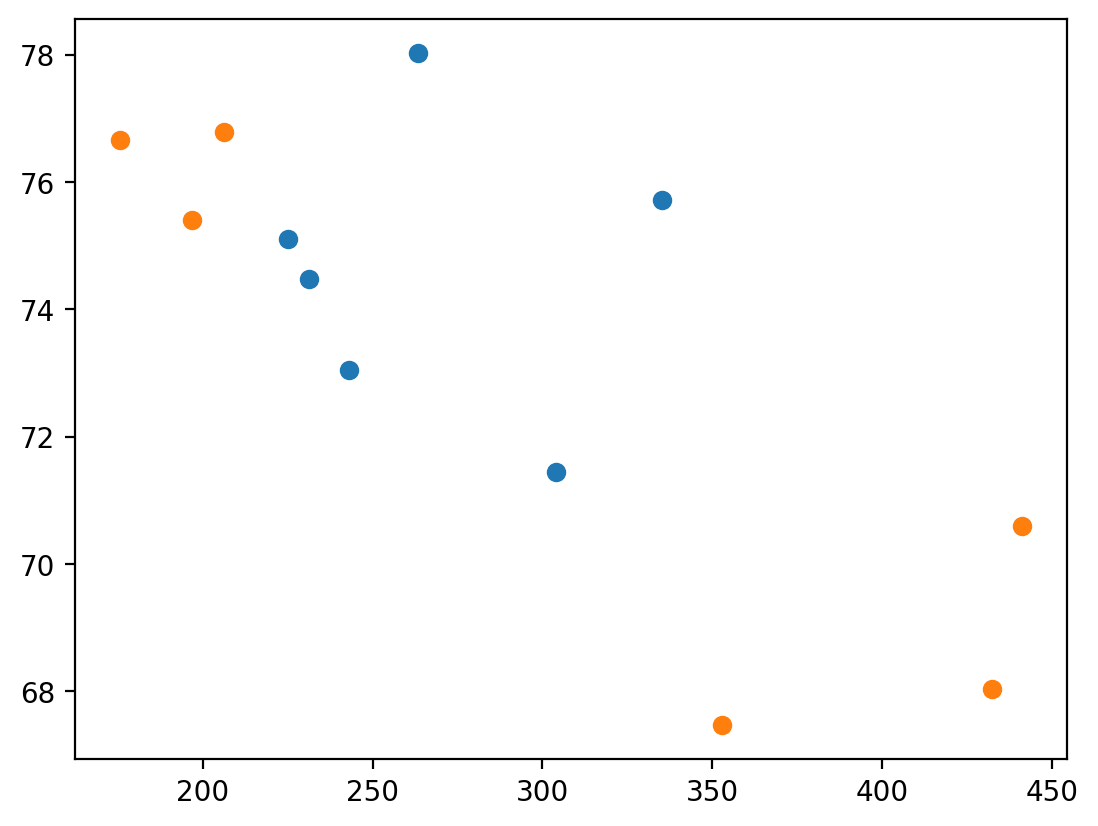

In [104]:
fields_1 = ['PCAT','PCAST','PANG','PFRAN','PMAT','PMED']
fields_2 = ['PCAT','PCAST','PANG','PFRAN','PMAT','PCIEN']
plot_scatter(primary_df,secondary_df,fields_1,fields_2)

In [ ]:
plot_averages_double(primary_df,secondary_df,fields_1,fields_2,title):